In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from typing import List, Dict
import numpy as np
import matplotlib.pyplot as plt
from poormansnn import NN, act, loss, opt, Layer

plt.rcParams["figure.figsize"] = (10,8)

def plotErrors(errors: Dict[str, List[float]]):
    for name, hist in errors.items():
        plt.plot(np.arange(len(hist)), hist, label=name)
    if len(errors):
        plt.title('Error history')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

def plotWeightHistory(n: NN, whist: List[np.ndarray], outnames: List[str]=[]):
    for i, l in enumerate(n.layers):
        plt.subplot(n.L, 1, i+1)
        plt.title('Layer {0}->{1} weights'.format(i, i+1))
        for j in range(l.w.shape[1]):
            plt.plot(np.arange(len(whist[i])), whist[n.L+i][:, j], label='Layer {0}, unit {1} bias'.format(i+1, outnames[j] if i==n.L-1 else j))
            for k in range(l.w.shape[0]):
                plt.plot(np.arange(len(whist[i])), whist[i][:, k, j], label='input {0}->unit {1}'.format(k, outnames[j] if i==n.L-1 else j))
        plt.legend()
    plt.xlabel('Epochs')
    plt.show()

def plotFinalWeights(n: NN, whist: List[np.ndarray], outnames: List[str]=[]):
    for i, l in enumerate(n.layers):
        plt.subplot(2, n.L, i+1)
        plt.imshow(l.w, cmap='coolwarm', vmin=-3, vmax=3)
        plt.title('Layer {0}->{1} weights'.format(i, i+1))
        if (i==n.L-1):
            plt.xticks(np.arange(l.w.shape[1]), outnames)
        else:
            plt.xticks(np.arange(l.w.shape[1]), np.arange(l.w.shape[1]))
        plt.yticks(np.arange(l.w.shape[0]), np.arange(l.w.shape[0]))
        plt.xlabel('Units')
        plt.ylabel('Inputs')

        plt.subplot(2, n.L, n.L+i+1)
        plt.imshow(l.b[np.newaxis, :], cmap='coolwarm', vmin=-3, vmax=3)
        plt.title('Layer {0}->{1} biases'.format(i, i+1))
        if (i==n.L-1):
            plt.xticks(np.arange(l.w.shape[1]), outnames)
        else:
            plt.xticks(np.arange(l.w.shape[1]), np.arange(l.w.shape[1]))
        plt.yticks(np.arange(l.w.shape[0]), np.arange(l.w.shape[0]))
        plt.xlabel('Units')
        plt.ylabel('Inputs')
    plt.colorbar(ax=plt.gcf().axes)

## AND gate

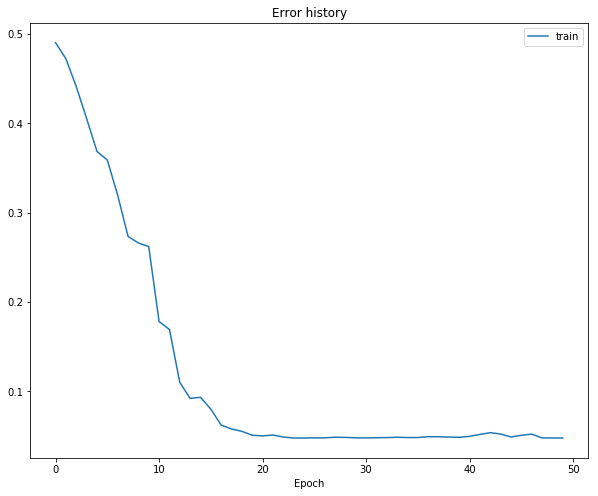

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.]])

In [10]:
batchsize = 4
epochs = 50
layers = [Layer((1,), (2,), act.Tanh())]
error = loss.SquaredLoss()
rate = 0.2
optimizer = opt.Optimizer(rate)

n = NN(layers, error=error, optimizer=optimizer)

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([[0],
              [0],
              [0],
              [1]])

errors, _ = n.train(X, Y, batchsize, epochs, train=(Y, X))
plotErrors(errors)
np.round(n.predict(X))

## OR gate

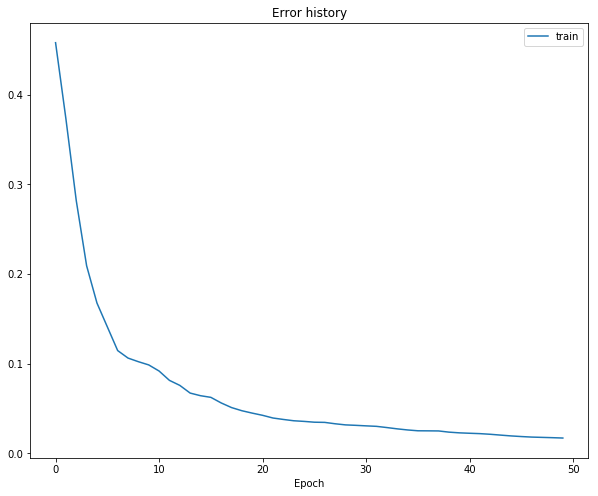

array([[ 0.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [11]:
batchsize = 4
epochs = 50
layers = [Layer((1,), (2,), act.Tanh())]
error = loss.SquaredLoss()
rate = 0.2
optimizer = opt.Optimizer(rate)

n = NN(layers, error=error, optimizer=optimizer)

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([[0],
              [1],
              [1],
              [1]])

errors, _ = n.train(X, Y, batchsize, epochs, train=(Y, X))
plotErrors(errors)
np.round(n.predict(X))

## XOR gate

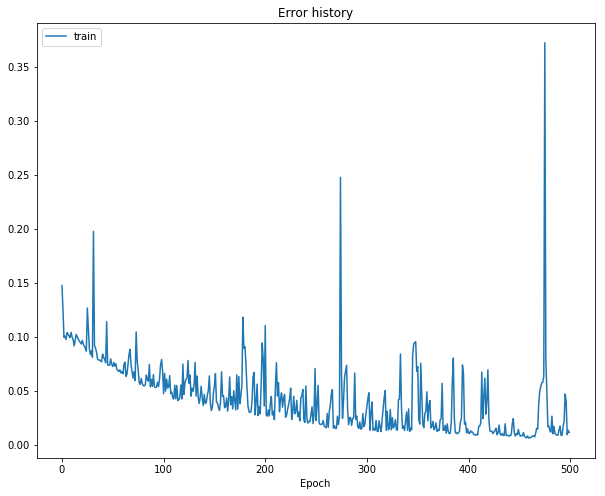

[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]


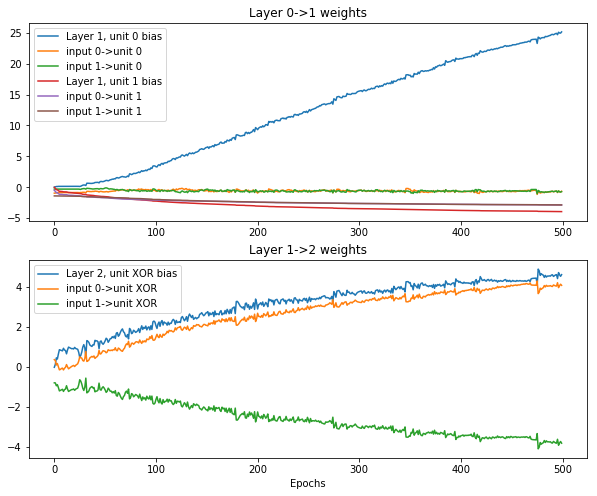

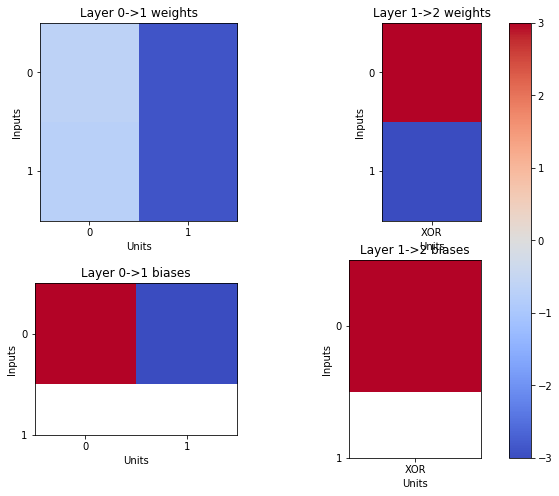

In [5]:
batchsize = 40
epochs = 500
layers = [Layer((2,), (2,), act.Tanh()), Layer((1,), (2,), act.Tanh())]
error = loss.SquaredLoss()
rate = 1.2
optimizer = opt.Optimizer(rate)

n = NN(layers, error=error, optimizer=optimizer)

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])

errors, whist = n.train(X, Y, batchsize, epochs, train=(Y, X), weighthist=True)
plotErrors(errors)
print(np.round(n.predict(X)))
plotWeightHistory(n, whist, ['XOR'])
plotFinalWeights(n, whist, ['XOR'])


## AND, OR, NAND, XOR gates combined

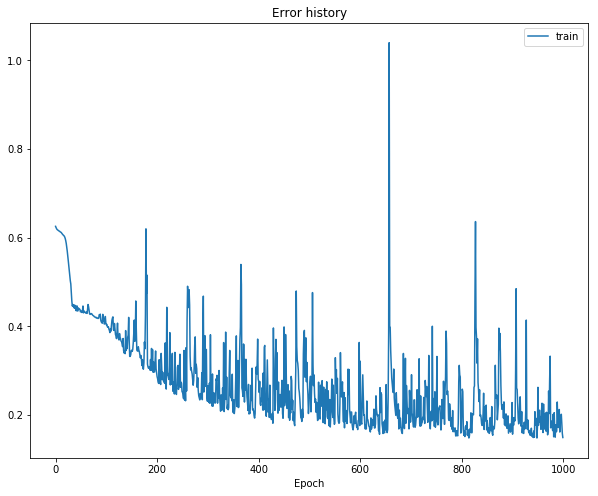

[[ 0.  0.  0.  0.]
 [ 0.  1.  1.  1.]
 [ 0.  1.  1.  1.]
 [ 1.  1.  0.  0.]]


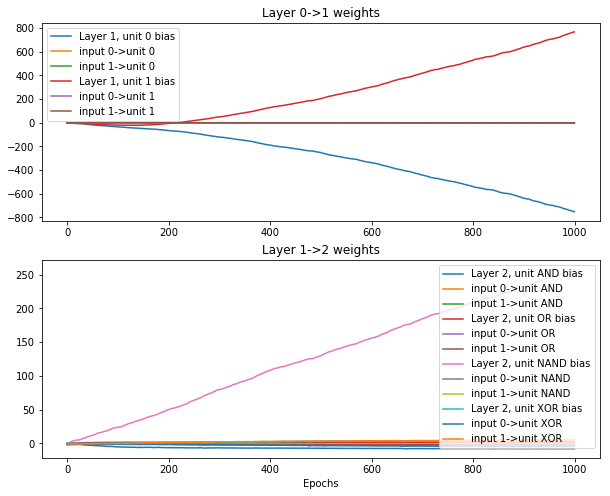

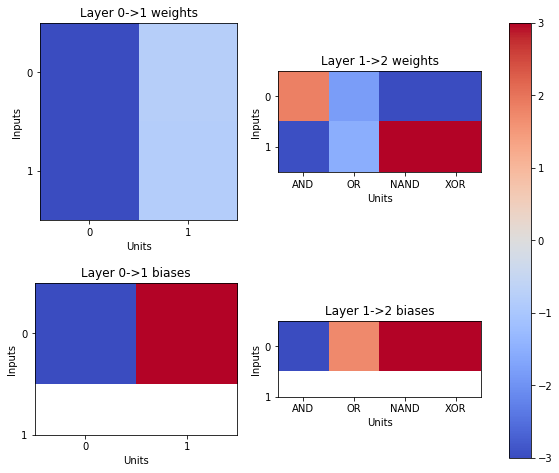

In [12]:
batchsize = 20
epochs = 1000
layers = [Layer((2,), (2,), act.Tanh()), Layer((4,), (2,), act.Tanh())]
error = loss.SquaredLoss()
rate = 0.7
optimizer = opt.Momentum(rate, 0.3)

n = NN(layers, error=error, optimizer=optimizer)

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([[0,0,1,0],
              [0,1,1,1],
              [0,1,1,1],
              [1,1,0,0]])

errors, whist = n.train(X, Y, batchsize, epochs, weighthist=True, train=(Y, X))
plotErrors(errors)
print(np.round(n.predict(X)))
plotWeightHistory(n, whist, ['AND', 'OR', 'NAND', 'XOR'])
plotFinalWeights(n, whist, ['AND', 'OR', 'NAND', 'XOR'])
